<a href="https://colab.research.google.com/github/melvinaquartey/ml-homework/blob/main/Homework4_ML_Prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 2

In [6]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'

# Download the dataset
urllib.request.urlretrieve(url, 'airfoil_self_noise.dat')

# Define column names based on the dataset description
column_names = ['Frequency (Hz)', 'Angle of attack (degrees)', 'Chord length (m)',
                'Free-stream velocity (m/s)', 'Suction side displacement thickness (m)',
                'Scaled sound pressure level (dB)']

# Load the dataset into a DataFrame
df = pd.read_csv('airfoil_self_noise.dat', sep='\t', names=column_names)

# Display the some rows of the DataFrame
print(df)


      Frequency (Hz)  Angle of attack (degrees)  Chord length (m)  \
0                800                        0.0            0.3048   
1               1000                        0.0            0.3048   
2               1250                        0.0            0.3048   
3               1600                        0.0            0.3048   
4               2000                        0.0            0.3048   
...              ...                        ...               ...   
1498            2500                       15.6            0.1016   
1499            3150                       15.6            0.1016   
1500            4000                       15.6            0.1016   
1501            5000                       15.6            0.1016   
1502            6300                       15.6            0.1016   

      Free-stream velocity (m/s)  Suction side displacement thickness (m)  \
0                           71.3                                 0.002663   
1                

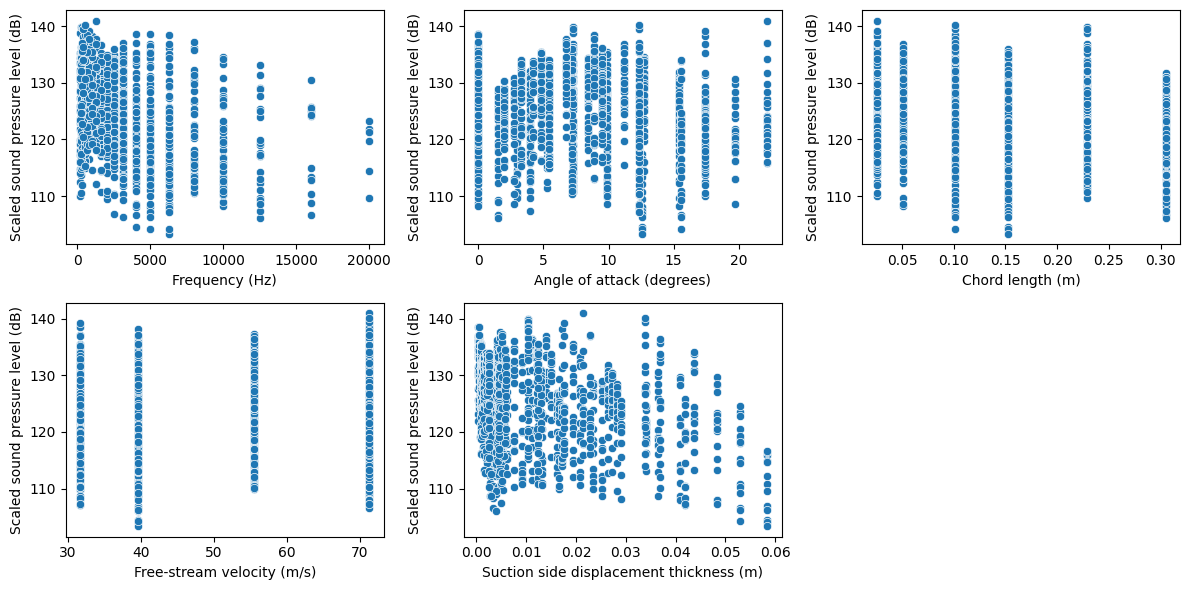

In [7]:
# Scatter plots of each attribute with the output
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.scatterplot(x='Frequency (Hz)', y='Scaled sound pressure level (dB)', data=df)
plt.subplot(2, 3, 2)
sns.scatterplot(x='Angle of attack (degrees)', y='Scaled sound pressure level (dB)', data=df)
plt.subplot(2, 3, 3)
sns.scatterplot(x='Chord length (m)', y='Scaled sound pressure level (dB)', data=df)
plt.subplot(2, 3, 4)
sns.scatterplot(x='Free-stream velocity (m/s)', y='Scaled sound pressure level (dB)', data=df)
plt.subplot(2, 3, 5)
sns.scatterplot(x='Suction side displacement thickness (m)', y='Scaled sound pressure level (dB)', data=df)
plt.tight_layout()
plt.show()

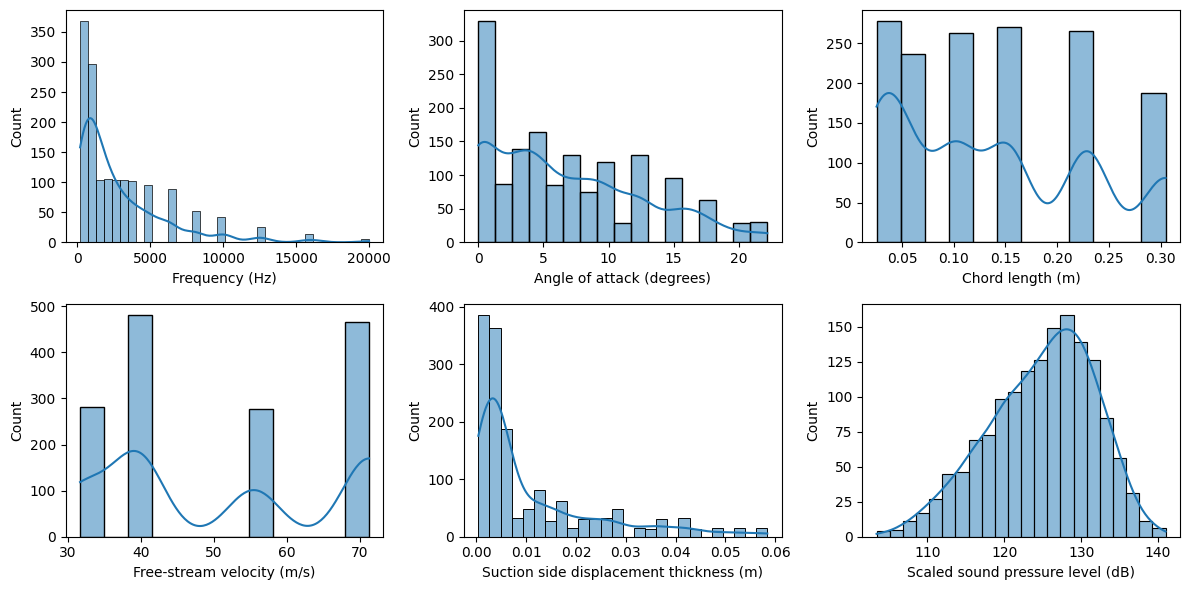

In [8]:
# Distribution plots detailing the counts of each attribute
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(df['Frequency (Hz)'], kde=True)
plt.subplot(2, 3, 2)
sns.histplot(df['Angle of attack (degrees)'], kde=True)
plt.subplot(2, 3, 3)
sns.histplot(df['Chord length (m)'], kde=True)
plt.subplot(2, 3, 4)
sns.histplot(df['Free-stream velocity (m/s)'], kde=True)
plt.subplot(2, 3, 5)
sns.histplot(df['Suction side displacement thickness (m)'], kde=True)
plt.subplot(2, 3, 6)
sns.histplot(df['Scaled sound pressure level (dB)'], kde=True)
plt.tight_layout()
plt.show()

In [16]:

# Data Preprocessing
data = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None)
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

#Building the Neural Network Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the Model
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_split=0.2, verbose=1)

#  Model Evaluation
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


Epoch 1/400
27/27 [==============================] - 1s 9ms/step - loss: 15450.8643 - mae: 124.1074 - val_loss: 15376.7256 - val_mae: 123.8093
Epoch 2/400
27/27 [==============================] - 0s 3ms/step - loss: 15043.8438 - mae: 122.4417 - val_loss: 14856.6279 - val_mae: 121.6616
Epoch 3/400
27/27 [==============================] - 0s 3ms/step - loss: 14359.2939 - mae: 119.5835 - val_loss: 13970.5283 - val_mae: 117.9034
Epoch 4/400
27/27 [==============================] - 0s 4ms/step - loss: 13215.0391 - mae: 114.6241 - val_loss: 12544.4658 - val_mae: 111.5593
Epoch 5/400
27/27 [==============================] - 0s 3ms/step - loss: 11469.1748 - mae: 106.5420 - val_loss: 10476.6738 - val_mae: 101.5747
Epoch 6/400
27/27 [==============================] - 0s 3ms/step - loss: 9106.7109 - mae: 94.4192 - val_loss: 7904.0215 - val_mae: 87.3564
Epoch 7/400
27/27 [==============================] - 0s 3ms/step - loss: 6412.8853 - mae: 78.0338 - val_loss: 5232.6382 - val_mae: 69.5283
Epoch 8

In [17]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("Coefficient of determination (R^2) on test data:", r2)


15/15 [==============================] - 0s 2ms/step
Coefficient of determination (R^2) on test data: 0.73211638048326


In [19]:
!pip install scikeras
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor

# Load the dataset
data = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None)
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Define a function to create the Keras model
def create_model(optimizer='adam', epochs=100, batch_size=32, verbose=0):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Create a KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [100, 200, 300],
    'batch_size': [16, 32, 64],
    'verbose': [0, 1],
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15392.8916 - mae: 123.8639
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 14326.0723 - mae: 119.4351
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 11782.2578 - mae: 108.0090
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 7479.2520 - mae: 84.8685
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 3130.5913 - mae: 51.7268
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 1013.8340 - mae: 26.6348
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 546.9437 - mae: 19.1364
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 427.9059 - mae: 16.6435
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 371.9645 - mae: 15.3793
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 334.3067 - mae: 14.5601
Epoch 11/100
44/44 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15454.5146 - mae: 124.1275
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 14710.8359 - mae: 121.0591
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 12730.4219 - mae: 112.4030
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 9008.4170 - mae: 93.5740
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 4535.9775 - mae: 63.5689
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 1584.0148 - mae: 35.1388
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 659.2098 - mae: 21.3920
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 465.4637 - mae: 17.6857
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 395.0440 - mae: 16.1563
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 351.0796 - mae: 15.1587
Epoch 11/100
44/44 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15300.4004 - mae: 123.4860
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 14115.9141 - mae: 118.5276
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 11430.0303 - mae: 106.2733
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 7136.6660 - mae: 82.5355
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 3025.1685 - mae: 50.3544
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 1037.4362 - mae: 27.5559
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 546.1951 - mae: 19.5667
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 412.7216 - mae: 16.5581
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 353.9936 - mae: 15.2381
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 318.9973 - mae: 14.3389
Epoch 11/100
44/44 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15391.7393 - mae: 123.8648
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 14336.2041 - mae: 119.4761
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 11762.9756 - mae: 107.9449
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 7370.0854 - mae: 84.3661
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 2969.9302 - mae: 50.2407
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 936.0201 - mae: 25.6281
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 519.8345 - mae: 18.6166
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 413.1406 - mae: 16.3416
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 359.9837 - mae: 15.2037
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 327.1746 - mae: 14.3954
Epoch 11/100
44/44 [==========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15194.1973 - mae: 123.0555
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 13898.5332 - mae: 117.5865
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 10931.6016 - mae: 103.8523
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 6298.6875 - mae: 77.1553
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 2322.9604 - mae: 42.9760
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 824.1675 - mae: 24.1488
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 518.8246 - mae: 18.9084
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 412.2323 - mae: 16.5284
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 357.0935 - mae: 15.2125
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 322.5633 - mae: 14.3627
Epoch 11/100
44/44 [==========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15277.8193 - mae: 123.3992
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 13981.9248 - mae: 117.9637
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 11029.9434 - mae: 104.3876
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 6439.7612 - mae: 78.2339
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 2401.0620 - mae: 43.7807
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 839.6870 - mae: 24.1885
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 534.0392 - mae: 18.9596
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 432.6998 - mae: 16.8334
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 378.8920 - mae: 15.5831
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 341.7513 - mae: 14.8233
Epoch 11/100
44/44 [==========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15522.1650 - mae: 124.3896
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 14884.8320 - mae: 121.7721
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 13362.1299 - mae: 115.2388
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 10322.6006 - mae: 100.8065
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 6117.5479 - mae: 76.0215
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 2508.2151 - mae: 45.8434
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - loss: 857.4187 - mae: 24.6206
Epoch 8/200
44/44 [==============================] - 0s 2ms/step - loss: 468.1630 - mae: 17.7111
Epoch 9/200
44/44 [==============================] - 0s 2ms/step - loss: 369.6594 - mae: 15.5497
Epoch 10/200
44/44 [==============================] - 0s 2ms/step - loss: 326.0810 - mae: 14.5730
Epoch 11/200
44/44 [=======

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15363.4775 - mae: 123.7586
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 14411.8447 - mae: 119.8147
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 12002.8477 - mae: 109.1092
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 7774.2466 - mae: 86.8966
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 3288.6987 - mae: 53.6257
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 1022.9075 - mae: 26.9910
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - loss: 548.0433 - mae: 19.3134
Epoch 8/200
44/44 [==============================] - 0s 2ms/step - loss: 444.3471 - mae: 17.1220
Epoch 9/200
44/44 [==============================] - 0s 2ms/step - loss: 393.1094 - mae: 15.9986
Epoch 10/200
44/44 [==============================] - 0s 2ms/step - loss: 356.9938 - mae: 15.2260
Epoch 11/200
44/44 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15282.5615 - mae: 123.4133
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 14092.4463 - mae: 118.4536
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 11352.0518 - mae: 106.0073
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 6907.6284 - mae: 81.5353
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 2664.1497 - mae: 47.5447
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 829.5499 - mae: 23.9943
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - loss: 509.3409 - mae: 17.8690
Epoch 8/200
44/44 [==============================] - 0s 2ms/step - loss: 435.1143 - mae: 16.5145
Epoch 9/200
44/44 [==============================] - 0s 2ms/step - loss: 387.0869 - mae: 15.5876
Epoch 10/200
44/44 [==============================] - 0s 2ms/step - loss: 350.1536 - mae: 14.8015
Epoch 11/200
44/44 [==========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15252.9043 - mae: 123.2934
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 13921.5459 - mae: 117.7237
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 11026.0674 - mae: 104.4405
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 6516.3062 - mae: 79.0553
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 2409.6914 - mae: 44.7485
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 765.9957 - mae: 22.7170
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - loss: 483.6293 - mae: 17.6812
Epoch 8/200
44/44 [==============================] - 0s 2ms/step - loss: 415.7749 - mae: 16.2537
Epoch 9/200
44/44 [==============================] - 0s 2ms/step - loss: 373.8770 - mae: 15.3565
Epoch 10/200
44/44 [==============================] - 0s 2ms/step - loss: 339.9468 - mae: 14.6198
Epoch 11/200
44/44 [==========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 2s 3ms/step - loss: 15375.2686 - mae: 123.7997
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 14397.8203 - mae: 119.7209
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 12022.0723 - mae: 109.0177
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 8021.9180 - mae: 87.6846
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 3772.3398 - mae: 56.6935
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 1419.5369 - mae: 32.0627
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - loss: 695.4857 - mae: 21.8097
Epoch 8/200
44/44 [==============================] - 0s 3ms/step - loss: 483.3669 - mae: 18.0736
Epoch 9/200
44/44 [==============================] - 0s 3ms/step - loss: 393.5652 - mae: 16.1299
Epoch 10/200
44/44 [==============================] - 0s 3ms/step - loss: 344.1409 - mae: 14.9845
Epoch 11/200
44/44 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15286.5596 - mae: 123.4281
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 14200.6729 - mae: 118.8854
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 11833.4209 - mae: 108.2160
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 7979.8188 - mae: 87.7200
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 3838.1396 - mae: 57.6954
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 1377.4767 - mae: 32.0622
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - loss: 614.3162 - mae: 20.8671
Epoch 8/200
44/44 [==============================] - 0s 2ms/step - loss: 424.6560 - mae: 16.9316
Epoch 9/200
44/44 [==============================] - 0s 2ms/step - loss: 351.9200 - mae: 15.1390
Epoch 10/200
44/44 [==============================] - 0s 2ms/step - loss: 311.1539 - mae: 14.1815
Epoch 11/200
44/44 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15445.2666 - mae: 124.0732
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 14527.7314 - mae: 120.2786
Epoch 3/300
44/44 [==============================] - 0s 2ms/step - loss: 12347.3008 - mae: 110.6693
Epoch 4/300
44/44 [==============================] - 0s 2ms/step - loss: 8483.7080 - mae: 90.9155
Epoch 5/300
44/44 [==============================] - 0s 2ms/step - loss: 4082.0139 - mae: 60.3452
Epoch 6/300
44/44 [==============================] - 0s 2ms/step - loss: 1352.1627 - mae: 31.7914
Epoch 7/300
44/44 [==============================] - 0s 2ms/step - loss: 573.5943 - mae: 19.7750
Epoch 8/300
44/44 [==============================] - 0s 2ms/step - loss: 415.2985 - mae: 16.5764
Epoch 9/300
44/44 [==============================] - 0s 3ms/step - loss: 356.0430 - mae: 15.3010
Epoch 10/300
44/44 [==============================] - 0s 3ms/step - loss: 320.5735 - mae: 14.4313
Epoch 11/300
44/44 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15503.6523 - mae: 124.3284
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 14892.7900 - mae: 121.8229
Epoch 3/300
44/44 [==============================] - 0s 2ms/step - loss: 13319.0645 - mae: 115.0982
Epoch 4/300
44/44 [==============================] - 0s 2ms/step - loss: 10174.1836 - mae: 100.1569
Epoch 5/300
44/44 [==============================] - 0s 2ms/step - loss: 5882.7598 - mae: 74.7521
Epoch 6/300
44/44 [==============================] - 0s 2ms/step - loss: 2338.5359 - mae: 43.4664
Epoch 7/300
44/44 [==============================] - 0s 2ms/step - loss: 873.2395 - mae: 24.9140
Epoch 8/300
44/44 [==============================] - 0s 2ms/step - loss: 543.7800 - mae: 19.3388
Epoch 9/300
44/44 [==============================] - 0s 2ms/step - loss: 442.0020 - mae: 17.1914
Epoch 10/300
44/44 [==============================] - 0s 2ms/step - loss: 389.0184 - mae: 15.9162
Epoch 11/300
44/44 [=======

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15324.0811 - mae: 123.5782
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 14393.2910 - mae: 119.7086
Epoch 3/300
44/44 [==============================] - 0s 2ms/step - loss: 12254.6123 - mae: 110.1763
Epoch 4/300
44/44 [==============================] - 0s 2ms/step - loss: 8568.9336 - mae: 91.1374
Epoch 5/300
44/44 [==============================] - 0s 2ms/step - loss: 4341.4258 - mae: 61.8676
Epoch 6/300
44/44 [==============================] - 0s 2ms/step - loss: 1655.1802 - mae: 34.7518
Epoch 7/300
44/44 [==============================] - 0s 2ms/step - loss: 789.8632 - mae: 23.4540
Epoch 8/300
44/44 [==============================] - 0s 2ms/step - loss: 558.4633 - mae: 19.3664
Epoch 9/300
44/44 [==============================] - 0s 2ms/step - loss: 461.6653 - mae: 17.3172
Epoch 10/300
44/44 [==============================] - 0s 2ms/step - loss: 404.2177 - mae: 16.0932
Epoch 11/300
44/44 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15478.8984 - mae: 124.2121
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 14693.5596 - mae: 120.9719
Epoch 3/300
44/44 [==============================] - 0s 2ms/step - loss: 12765.7949 - mae: 112.5756
Epoch 4/300
44/44 [==============================] - 0s 2ms/step - loss: 9058.3613 - mae: 94.0485
Epoch 5/300
44/44 [==============================] - 0s 2ms/step - loss: 4500.2866 - mae: 64.0640
Epoch 6/300
44/44 [==============================] - 0s 2ms/step - loss: 1504.3939 - mae: 33.7854
Epoch 7/300
44/44 [==============================] - 0s 2ms/step - loss: 619.5944 - mae: 20.4934
Epoch 8/300
44/44 [==============================] - 0s 2ms/step - loss: 446.3426 - mae: 17.0493
Epoch 9/300
44/44 [==============================] - 0s 2ms/step - loss: 378.8029 - mae: 15.6777
Epoch 10/300
44/44 [==============================] - 0s 2ms/step - loss: 338.7966 - mae: 14.7524
Epoch 11/300
44/44 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15480.9883 - mae: 124.2280
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 14739.9229 - mae: 121.1677
Epoch 3/300
44/44 [==============================] - 0s 3ms/step - loss: 12991.7764 - mae: 113.6079
Epoch 4/300
44/44 [==============================] - 0s 2ms/step - loss: 9775.4355 - mae: 97.9523
Epoch 5/300
44/44 [==============================] - 0s 3ms/step - loss: 5666.5205 - mae: 72.8505
Epoch 6/300
44/44 [==============================] - 0s 2ms/step - loss: 2368.3499 - mae: 43.5231
Epoch 7/300
44/44 [==============================] - 0s 3ms/step - loss: 968.1088 - mae: 26.1776
Epoch 8/300
44/44 [==============================] - 0s 2ms/step - loss: 604.5533 - mae: 20.5463
Epoch 9/300
44/44 [==============================] - 0s 2ms/step - loss: 478.0160 - mae: 17.9721
Epoch 10/300
44/44 [==============================] - 0s 3ms/step - loss: 411.9695 - mae: 16.3986
Epoch 11/300
44/44 [=========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 [==============================] - 1s 2ms/step - loss: 15205.6035 - mae: 123.1046
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 13949.4131 - mae: 117.8455
Epoch 3/300
44/44 [==============================] - 0s 3ms/step - loss: 11113.1406 - mae: 104.8711
Epoch 4/300
44/44 [==============================] - 0s 2ms/step - loss: 6759.2930 - mae: 80.2990
Epoch 5/300
44/44 [==============================] - 0s 2ms/step - loss: 2773.7869 - mae: 47.6859
Epoch 6/300
44/44 [==============================] - 0s 2ms/step - loss: 964.9072 - mae: 25.4028
Epoch 7/300
44/44 [==============================] - 0s 2ms/step - loss: 550.2997 - mae: 19.1405
Epoch 8/300
44/44 [==============================] - 0s 2ms/step - loss: 435.4860 - mae: 16.8106
Epoch 9/300
44/44 [==============================] - 0s 2ms/step - loss: 380.3715 - mae: 15.5758
Epoch 10/300
44/44 [==============================] - 0s 2ms/step - loss: 341.6603 - mae: 14.6827
Epoch 11/300
44/44 [==========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15581.5225 - mae: 124.6307
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 15322.0498 - mae: 123.5799
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 14943.1367 - mae: 122.0261
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 14290.4170 - mae: 119.2969
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 13246.0928 - mae: 114.7809
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 11719.9453 - mae: 107.7959
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 9726.1162 - mae: 97.8475
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 7385.4795 - mae: 84.5916
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 5034.2642 - mae: 68.4674
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 3042.3396 - mae: 51.2278
Epoch 11/100
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15492.9873 - mae: 124.2844
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 15192.8799 - mae: 123.0611
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 14715.4463 - mae: 121.0868
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 13922.0859 - mae: 117.7304
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 12691.2266 - mae: 112.2880
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 10963.2803 - mae: 104.1336
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 8773.8877 - mae: 92.6063
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 6353.0776 - mae: 77.9195
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 4076.6326 - mae: 60.9679
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 2324.2700 - mae: 44.2192
Epoch 11/100
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 4ms/step - loss: 15615.8623 - mae: 124.7661
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 15363.6250 - mae: 123.7427
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 15000.2578 - mae: 122.2492
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 14389.2412 - mae: 119.6956
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 13408.3291 - mae: 115.4689
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 11962.7412 - mae: 108.8980
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 10031.6328 - mae: 99.4016
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 7747.0156 - mae: 86.7171
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 5397.4951 - mae: 71.0559
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 3367.6995 - mae: 53.9434
Epoch 11/100
22/22

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15555.1182 - mae: 124.5289
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 15222.5938 - mae: 123.1841
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 14646.7920 - mae: 120.8124
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 13705.6318 - mae: 116.8175
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 12261.1924 - mae: 110.3764
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 10280.2480 - mae: 100.7924
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 7885.5986 - mae: 87.7046
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 5361.6118 - mae: 71.1425
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 3152.3831 - mae: 52.4068
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 1632.5302 - mae: 36.1138
Epoch 11/100
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 15531.2207 - mae: 124.4357
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 15240.8857 - mae: 123.2534
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 14777.8369 - mae: 121.3393
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 14044.1514 - mae: 118.2449
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 12950.1650 - mae: 113.4530
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 11426.5371 - mae: 106.3920
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 9481.1689 - mae: 96.5256
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 7264.0850 - mae: 83.7544
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 5046.0669 - mae: 68.5331
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 3159.3350 - mae: 52.2181
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15540.5088 - mae: 124.4684
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 15244.7852 - mae: 123.2646
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 14828.7705 - mae: 121.5527
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 14171.2090 - mae: 118.7922
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 13172.2070 - mae: 114.4541
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 11754.2549 - mae: 107.9635
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 9927.5312 - mae: 98.9282
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 7794.6167 - mae: 87.0417
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 5596.9253 - mae: 72.6631
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 3644.9316 - mae: 56.5975
Epoch 11/100
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15507.4775 - mae: 124.3345
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 15184.3809 - mae: 123.0271
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 14566.1074 - mae: 120.4754
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 13502.5439 - mae: 115.9345
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 11867.6123 - mae: 108.5740
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 9629.4248 - mae: 97.5444
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 6993.5884 - mae: 82.4733
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 4375.6514 - mae: 63.9174
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 2328.0447 - mae: 44.4187
Epoch 10/200
22/22 [==============================] - 0s 4ms/step - loss: 1156.5391 - mae: 29.1316
Epoch 11/200
22/22 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15508.7373 - mae: 124.3451
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 15181.2686 - mae: 123.0073
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 14650.0215 - mae: 120.8011
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 13793.3721 - mae: 117.1464
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 12520.5068 - mae: 111.4753
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 10804.3799 - mae: 103.2835
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 8691.0723 - mae: 92.0771
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 6392.8496 - mae: 77.8170
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 4246.9438 - mae: 61.7612
Epoch 10/200
22/22 [==============================] - 0s 4ms/step - loss: 2579.4565 - mae: 46.0356
Epoch 11/200
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15452.4160 - mae: 124.0981
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 15106.8330 - mae: 122.6796
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 14543.1592 - mae: 120.3242
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 13627.0752 - mae: 116.3902
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 12246.8760 - mae: 110.1553
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 10365.5713 - mae: 100.9687
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 8072.1875 - mae: 88.4130
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 5662.4546 - mae: 72.5151
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 3533.4951 - mae: 55.1945
Epoch 10/200
22/22 [==============================] - 0s 3ms/step - loss: 2001.4717 - mae: 40.2407
Epoch 11/200
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 4ms/step - loss: 15573.2871 - mae: 124.5994
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 15271.6592 - mae: 123.3722
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 14782.0703 - mae: 121.3493
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 13973.7871 - mae: 117.9416
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 12744.4961 - mae: 112.5239
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 11026.1934 - mae: 104.4647
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 8865.5723 - mae: 93.2740
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 6468.9546 - mae: 78.7333
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 4206.0913 - mae: 61.9712
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 2442.0986 - mae: 45.1177
Epoch 11/200
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15515.9404 - mae: 124.3734
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 15199.5479 - mae: 123.0849
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 14674.5361 - mae: 120.9109
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 13784.9717 - mae: 117.1351
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 12415.0547 - mae: 111.0421
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 10529.1084 - mae: 102.0215
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 8204.6260 - mae: 89.5465
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 5721.5708 - mae: 73.7159
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 3521.0725 - mae: 55.8247
Epoch 10/200
22/22 [==============================] - 0s 3ms/step - loss: 1945.7198 - mae: 39.0686
Epoch 11/200
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15535.7207 - mae: 124.4408
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 15308.0488 - mae: 123.5165
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 14955.9561 - mae: 122.0694
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 14365.4404 - mae: 119.5951
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 13413.6885 - mae: 115.4807
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 12037.5498 - mae: 109.2150
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 10217.3730 - mae: 100.2549
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 8072.6802 - mae: 88.4110
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 5829.5977 - mae: 73.8240
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 3821.2095 - mae: 57.9223
Epoch 11/200
22/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15486.8887 - mae: 124.2466
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 15138.8721 - mae: 122.8227
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 14572.5850 - mae: 120.4708
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 13644.8545 - mae: 116.4916
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 12239.1484 - mae: 110.1209
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 10340.2197 - mae: 100.8554
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 8040.9253 - mae: 88.1690
Epoch 8/300
22/22 [==============================] - 0s 3ms/step - loss: 5634.8228 - mae: 72.3092
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 3520.5017 - mae: 55.1228
Epoch 10/300
22/22 [==============================] - 0s 3ms/step - loss: 1993.5229 - mae: 40.0953
Epoch 11/300
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 4ms/step - loss: 15506.7021 - mae: 124.3300
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 15184.3213 - mae: 123.0180
Epoch 3/300
22/22 [==============================] - 0s 4ms/step - loss: 14675.0938 - mae: 120.9110
Epoch 4/300
22/22 [==============================] - 0s 4ms/step - loss: 13826.2227 - mae: 117.2980
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 12503.4551 - mae: 111.4158
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 10642.4834 - mae: 102.4907
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 8331.1260 - mae: 90.0631
Epoch 8/300
22/22 [==============================] - 0s 4ms/step - loss: 5852.5781 - mae: 74.1402
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 3637.6228 - mae: 56.2630
Epoch 10/300
22/22 [==============================] - 0s 3ms/step - loss: 2078.3350 - mae: 39.5587
Epoch 11/300
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15427.3574 - mae: 124.0069
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 14980.2422 - mae: 122.1813
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 14245.4756 - mae: 119.0991
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 13077.5840 - mae: 114.0193
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 11372.0723 - mae: 106.1169
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 9129.1855 - mae: 94.6243
Epoch 7/300
22/22 [==============================] - 0s 4ms/step - loss: 6559.5371 - mae: 79.2623
Epoch 8/300
22/22 [==============================] - 0s 3ms/step - loss: 4118.6836 - mae: 61.1380
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 2272.9902 - mae: 43.1457
Epoch 10/300
22/22 [==============================] - 0s 2ms/step - loss: 1224.9242 - mae: 30.0583
Epoch 11/300
22/22 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15550.1279 - mae: 124.5057
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 15215.3428 - mae: 123.1460
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 14678.2822 - mae: 120.9308
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 13829.8555 - mae: 117.3409
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 12564.8428 - mae: 111.7447
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 10850.9834 - mae: 103.6233
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 8740.2178 - mae: 92.5904
Epoch 8/300
22/22 [==============================] - 0s 3ms/step - loss: 6418.1792 - mae: 78.5679
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 4198.5117 - mae: 62.1128
Epoch 10/300
22/22 [==============================] - 0s 3ms/step - loss: 2428.9692 - mae: 45.4893
Epoch 11/300
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 2ms/step - loss: 15535.4932 - mae: 124.4567
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 15214.5508 - mae: 123.1516
Epoch 3/300
22/22 [==============================] - 0s 4ms/step - loss: 14707.8271 - mae: 121.0632
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 13916.1396 - mae: 117.7124
Epoch 5/300
22/22 [==============================] - 0s 4ms/step - loss: 12736.5732 - mae: 112.5211
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 11102.4307 - mae: 104.9016
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 9057.2080 - mae: 94.3557
Epoch 8/300
22/22 [==============================] - 0s 4ms/step - loss: 6774.7217 - mae: 80.9602
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 4551.3540 - mae: 64.9949
Epoch 10/300
22/22 [==============================] - 0s 3ms/step - loss: 2730.5903 - mae: 48.5448
Epoch 11/300
22/22 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


22/22 [==============================] - 1s 3ms/step - loss: 15421.2197 - mae: 123.9857
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 15052.6182 - mae: 122.4855
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 14426.4219 - mae: 119.8876
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 13402.5537 - mae: 115.5126
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 11876.3398 - mae: 108.6118
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 9848.9629 - mae: 98.6401
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 7441.3774 - mae: 85.1467
Epoch 8/300
22/22 [==============================] - 0s 4ms/step - loss: 4993.4146 - mae: 68.4955
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 2945.8596 - mae: 50.1876
Epoch 10/300
22/22 [==============================] - 0s 4ms/step - loss: 1618.1647 - mae: 34.7280
Epoch 11/300
22/22 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 15575.1182 - mae: 124.6007
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 15439.1797 - mae: 124.0500
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 15277.3564 - mae: 123.3908
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 15073.4033 - mae: 122.5552
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 14800.5625 - mae: 121.4298
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 14445.4434 - mae: 119.9444
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 13987.0186 - mae: 117.9989
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 13410.9775 - mae: 115.4965
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 12708.7773 - mae: 112.3651
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 11872.7393 - mae: 108.5165
Epoch 11/10

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 4ms/step - loss: 15481.9805 - mae: 124.2393
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 15308.6133 - mae: 123.5369
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 15098.0908 - mae: 122.6780
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 14827.0742 - mae: 121.5634
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 14472.1025 - mae: 120.0835
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 14020.1494 - mae: 118.1717
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 13455.2266 - mae: 115.7338
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 12764.6006 - mae: 112.6755
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 11925.7227 - mae: 108.8262
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 10954.0830 - mae: 104.1798
Epoch 11/10

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
11/11 [==============================] - 1s 6ms/step - loss: 15562.3164 - mae: 124.5525
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 15427.6025 - mae: 124.0059
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 15279.4854 - mae: 123.4001
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 15097.4482 - mae: 122.6539
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 14860.8643 - mae: 121.6737
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 14555.0195 - mae: 120.3957
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 14164.7578 - mae: 118.7381
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 13686.1855 - mae: 116.6743
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 13099.7139 - mae: 114.0811
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 12408.0498 - mae: 110.9380

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 15681.2100 - mae: 125.0384
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 15579.6865 - mae: 124.6303
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 15476.7002 - mae: 124.2151
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 15357.8164 - mae: 123.7342
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 15212.3213 - mae: 123.1429
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 15027.6914 - mae: 122.3888
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 14793.0371 - mae: 121.4219
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 14500.8428 - mae: 120.2078
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 14138.4307 - mae: 118.6807
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 13691.9004 - mae: 116.7732
Epoch 11/10

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 4ms/step - loss: 15581.8828 - mae: 124.6438
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 15456.9785 - mae: 124.1395
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 15307.6562 - mae: 123.5332
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 15118.7471 - mae: 122.7616
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 14867.8877 - mae: 121.7297
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 14544.6533 - mae: 120.3864
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 14128.8164 - mae: 118.6333
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 13600.5293 - mae: 116.3620
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 12950.9219 - mae: 113.5051
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 12160.7471 - mae: 109.9172
Epoch 11/10

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 4ms/step - loss: 15479.7275 - mae: 124.2160
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 15313.4473 - mae: 123.5394
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 15101.6621 - mae: 122.6739
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 14831.2910 - mae: 121.5567
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 14486.5195 - mae: 120.1199
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 14054.1113 - mae: 118.2868
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 13517.7109 - mae: 115.9725
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 12859.9941 - mae: 113.0522
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 12078.1963 - mae: 109.4920
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 11153.5566 - mae: 105.0889
Epoch 11/10

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 7ms/step - loss: 15677.7207 - mae: 125.0192
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 15562.8760 - mae: 124.5567
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 15443.4336 - mae: 124.0718
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 15299.8018 - mae: 123.4876
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 15120.9785 - mae: 122.7567
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 14894.7490 - mae: 121.8244
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 14604.0273 - mae: 120.6156
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 14238.4004 - mae: 119.0746
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 13782.3984 - mae: 117.1299
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 13224.5723 - mae: 114.6928
Epoch 11/20

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 4ms/step - loss: 15501.1650 - mae: 124.3199
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 15351.3877 - mae: 123.7121
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 15163.2539 - mae: 122.9439
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 14913.6201 - mae: 121.9171
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 14575.5967 - mae: 120.5120
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 14142.2256 - mae: 118.6832
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 13590.3994 - mae: 116.3127
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 12911.5488 - mae: 113.3162
Epoch 9/200
11/11 [==============================] - 0s 5ms/step - loss: 12094.5137 - mae: 109.5954
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 11139.3740 - mae: 105.0544
Epoch 11/20

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 5ms/step - loss: 15524.6299 - mae: 124.3987
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 15382.7617 - mae: 123.8231
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 15211.1299 - mae: 123.1232
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 14984.6680 - mae: 122.1931
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 14684.5840 - mae: 120.9492
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 14296.0430 - mae: 119.3176
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 13806.9355 - mae: 117.2288
Epoch 8/200
11/11 [==============================] - 0s 5ms/step - loss: 13190.8779 - mae: 114.5381
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 12441.5000 - mae: 111.1735
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 11550.2148 - mae: 107.0151
Epoch 11/20

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 2s 3ms/step - loss: 15568.4932 - mae: 124.5768
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 15421.5596 - mae: 123.9807
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 15231.4053 - mae: 123.2043
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 14970.5518 - mae: 122.1301
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 14615.3184 - mae: 120.6523
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 14153.0771 - mae: 118.6952
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 13568.7734 - mae: 116.1735
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 12846.7080 - mae: 112.9594
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 11975.5508 - mae: 108.9484
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 10958.8115 - mae: 104.0455
Epoch 11/20

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 5ms/step - loss: 15605.3066 - mae: 124.7352
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 15468.5264 - mae: 124.1804
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 15321.8818 - mae: 123.5822
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 15142.0781 - mae: 122.8427
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 14911.1416 - mae: 121.8879
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 14607.9629 - mae: 120.6202
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 14210.2881 - mae: 118.9338
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 13702.4648 - mae: 116.7391
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 13078.8232 - mae: 113.9742
Epoch 10/200
11/11 [==============================] - 0s 5ms/step - loss: 12325.7822 - mae: 110.5246
Epoch 11/20

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 4ms/step - loss: 15614.3486 - mae: 124.7664
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 15511.9697 - mae: 124.3536
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 15406.7090 - mae: 123.9274
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 15281.2676 - mae: 123.4168
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 15118.7881 - mae: 122.7539
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 14914.1543 - mae: 121.9139
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 14647.8564 - mae: 120.8110
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 14309.0596 - mae: 119.3912
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 13880.9756 - mae: 117.5700
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 13349.6406 - mae: 115.2651
Epoch 11/20

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 15682.1025 - mae: 125.0358
Epoch 2/300
11/11 [==============================] - 0s 3ms/step - loss: 15557.7676 - mae: 124.5361
Epoch 3/300
11/11 [==============================] - 0s 3ms/step - loss: 15424.0225 - mae: 123.9954
Epoch 4/300
11/11 [==============================] - 0s 4ms/step - loss: 15266.2881 - mae: 123.3527
Epoch 5/300
11/11 [==============================] - 0s 4ms/step - loss: 15071.2549 - mae: 122.5547
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 14830.0527 - mae: 121.5589
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 14527.1641 - mae: 120.2952
Epoch 8/300
11/11 [==============================] - 0s 3ms/step - loss: 14144.6289 - mae: 118.6799
Epoch 9/300
11/11 [==============================] - 0s 3ms/step - loss: 13679.6689 - mae: 116.6841
Epoch 10/300
11/11 [==============================] - 0s 4ms/step - loss: 13107.2471 - mae: 114.1709
Epoch 11/30

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 7ms/step - loss: 15592.0957 - mae: 124.6837
Epoch 2/300
11/11 [==============================] - 0s 3ms/step - loss: 15467.1279 - mae: 124.1771
Epoch 3/300
11/11 [==============================] - 0s 3ms/step - loss: 15311.7686 - mae: 123.5448
Epoch 4/300
11/11 [==============================] - 0s 4ms/step - loss: 15110.2910 - mae: 122.7206
Epoch 5/300
11/11 [==============================] - 0s 3ms/step - loss: 14841.6279 - mae: 121.6105
Epoch 6/300
11/11 [==============================] - 0s 4ms/step - loss: 14494.2637 - mae: 120.1585
Epoch 7/300
11/11 [==============================] - 0s 3ms/step - loss: 14046.7793 - mae: 118.2621
Epoch 8/300
11/11 [==============================] - 0s 4ms/step - loss: 13492.0225 - mae: 115.8644
Epoch 9/300
11/11 [==============================] - 0s 4ms/step - loss: 12807.2979 - mae: 112.8244
Epoch 10/300
11/11 [==============================] - 0s 4ms/step - loss: 11994.9297 - mae: 109.0923
Epoch 11/30

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 15567.0029 - mae: 124.5730
Epoch 2/300
11/11 [==============================] - 0s 4ms/step - loss: 15445.8672 - mae: 124.0845
Epoch 3/300
11/11 [==============================] - 0s 4ms/step - loss: 15303.6123 - mae: 123.5096
Epoch 4/300
11/11 [==============================] - 0s 3ms/step - loss: 15116.9121 - mae: 122.7499
Epoch 5/300
11/11 [==============================] - 0s 4ms/step - loss: 14864.2520 - mae: 121.7129
Epoch 6/300
11/11 [==============================] - 0s 3ms/step - loss: 14528.0713 - mae: 120.3209
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 14089.2246 - mae: 118.4738
Epoch 8/300
11/11 [==============================] - 0s 4ms/step - loss: 13540.0713 - mae: 116.1214
Epoch 9/300
11/11 [==============================] - 0s 3ms/step - loss: 12857.5186 - mae: 113.1197
Epoch 10/300
11/11 [==============================] - 0s 4ms/step - loss: 12041.7607 - mae: 109.4241
Epoch 11/30

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 15568.0439 - mae: 124.5733
Epoch 2/300
11/11 [==============================] - 0s 3ms/step - loss: 15396.8389 - mae: 123.8804
Epoch 3/300
11/11 [==============================] - 0s 3ms/step - loss: 15203.9033 - mae: 123.0932
Epoch 4/300
11/11 [==============================] - 0s 3ms/step - loss: 14963.0684 - mae: 122.1027
Epoch 5/300
11/11 [==============================] - 0s 3ms/step - loss: 14658.3086 - mae: 120.8373
Epoch 6/300
11/11 [==============================] - 0s 3ms/step - loss: 14270.5068 - mae: 119.2015
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 13787.2324 - mae: 117.1258
Epoch 8/300
11/11 [==============================] - 0s 4ms/step - loss: 13193.5254 - mae: 114.5165
Epoch 9/300
11/11 [==============================] - 0s 4ms/step - loss: 12487.9102 - mae: 111.3345
Epoch 10/300
11/11 [==============================] - 0s 3ms/step - loss: 11662.3867 - mae: 107.4625
Epoch 11/30

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 4ms/step - loss: 15611.4395 - mae: 124.7634
Epoch 2/300
11/11 [==============================] - 0s 4ms/step - loss: 15462.2998 - mae: 124.1632
Epoch 3/300
11/11 [==============================] - 0s 3ms/step - loss: 15301.4111 - mae: 123.5109
Epoch 4/300
11/11 [==============================] - 0s 3ms/step - loss: 15107.5264 - mae: 122.7215
Epoch 5/300
11/11 [==============================] - 0s 3ms/step - loss: 14865.0557 - mae: 121.7237
Epoch 6/300
11/11 [==============================] - 0s 3ms/step - loss: 14550.5049 - mae: 120.4178
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 14150.5332 - mae: 118.7342
Epoch 8/300
11/11 [==============================] - 0s 3ms/step - loss: 13651.7891 - mae: 116.5972
Epoch 9/300
11/11 [==============================] - 0s 3ms/step - loss: 13041.1729 - mae: 113.9235
Epoch 10/300
11/11 [==============================] - 0s 3ms/step - loss: 12300.3877 - mae: 110.5831
Epoch 11/30

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
11/11 [==============================] - 1s 3ms/step - loss: 15550.2080 - mae: 124.5000
Epoch 2/300
11/11 [==============================] - 0s 3ms/step - loss: 15418.4141 - mae: 123.9638
Epoch 3/300
11/11 [==============================] - 0s 3ms/step - loss: 15267.2803 - mae: 123.3463
Epoch 4/300
11/11 [==============================] - 0s 5ms/step - loss: 15078.5869 - mae: 122.5726
Epoch 5/300
11/11 [==============================] - 0s 4ms/step - loss: 14836.7705 - mae: 121.5723
Epoch 6/300
11/11 [==============================] - 0s 3ms/step - loss: 14525.7891 - mae: 120.2706
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 14135.6826 - mae: 118.6161
Epoch 8/300
11/11 [==============================] - 0s 3ms/step - loss: 13653.1299 - mae: 116.5362
Epoch 9/300
11/11 [==============================] - 0s 3ms/step - loss: 13062.7363 - mae: 113.9332
Epoch 10/300
11/11 [==============================] - 0s 3ms/step - loss: 12353.7754 - mae: 110.7162

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


66/66 [==============================] - 1s 3ms/step - loss: 15240.0117 - mae: 123.2439
Epoch 2/300
66/66 [==============================] - 0s 3ms/step - loss: 12947.5742 - mae: 113.4125
Epoch 3/300
66/66 [==============================] - 0s 3ms/step - loss: 7311.1797 - mae: 83.7185
Epoch 4/300
66/66 [==============================] - 0s 3ms/step - loss: 1919.0725 - mae: 38.1385
Epoch 5/300
66/66 [==============================] - 0s 3ms/step - loss: 586.2069 - mae: 19.9888
Epoch 6/300
66/66 [==============================] - 0s 3ms/step - loss: 424.4448 - mae: 16.6143
Epoch 7/300
66/66 [==============================] - 0s 3ms/step - loss: 355.9388 - mae: 15.0579
Epoch 8/300
66/66 [==============================] - 0s 3ms/step - loss: 307.6540 - mae: 13.9566
Epoch 9/300
66/66 [==============================] - 0s 3ms/step - loss: 266.4656 - mae: 13.0349
Epoch 10/300
66/66 [==============================] - 0s 3ms/step - loss: 232.2321 - mae: 12.1772
Epoch 11/300
66/66 [=============

In [20]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -9.520004 using {'batch_size': 16, 'epochs': 300, 'optimizer': 'adam', 'verbose': 1}


In [21]:
# Data Preprocessing
data = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None)
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

#Building the Neural Network Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the Model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, verbose=1)

#  Model Evaluation
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


Epoch 1/300
53/53 [==============================] - 5s 40ms/step - loss: 15317.6768 - mae: 123.5527 - val_loss: 15033.7021 - val_mae: 122.3924
Epoch 2/300
53/53 [==============================] - 1s 10ms/step - loss: 14183.8691 - mae: 118.8015 - val_loss: 13214.4453 - val_mae: 114.5975
Epoch 3/300
53/53 [==============================] - 1s 10ms/step - loss: 11335.1143 - mae: 105.7795 - val_loss: 9243.0312 - val_mae: 95.1299
Epoch 4/300
53/53 [==============================] - 1s 13ms/step - loss: 6594.3462 - mae: 78.8368 - val_loss: 4221.4199 - val_mae: 61.6419
Epoch 5/300
53/53 [==============================] - 1s 17ms/step - loss: 2439.8691 - mae: 43.9751 - val_loss: 1352.1317 - val_mae: 31.7190
Epoch 6/300
53/53 [==============================] - 0s 6ms/step - loss: 849.4759 - mae: 24.4112 - val_loss: 651.9361 - val_mae: 21.3032
Epoch 7/300
53/53 [==============================] - 0s 8ms/step - loss: 509.0992 - mae: 18.5716 - val_loss: 456.8932 - val_mae: 17.9019
Epoch 8/300
53/5

In [22]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("Coefficient of determination (R^2) on test data:", r2)


15/15 [==============================] - 0s 9ms/step
Coefficient of determination (R^2) on test data: 0.7079557549749337
